
<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;">
    <h1 style='margin:15px 15px; color:#4B0082; font-size:40px'>Algorithm Apriori</h1>
    <h1 style='margin:15px 15px; color:#000; font-size:15px'>Realized by: AKHADAM Ayoub</h1>
   
</div>
    
    

    
    04/11/2021
    
    

    The nursery school database is derived from a hierarchical decision model originally developed to
    originally developed to rank preschool applications.
    The final decision depended on three sub-problems:

    - parents' occupation and the child's nursery, family structure.
    - the structure and financial situation of the family
    - the social and health image of the family.
    
    The crèche database contains examples where the structural information has been 
    structural information has been removed, i.e., it links the crèche directly to 
    the crèche to the eight input attributes: parents, has_nurs, form, children, housing, 
    finance, social, health.


In [70]:
library(arules)
library(arulesViz)
library(RColorBrewer)

options(warn=-1)

In [1]:
nursery <-read.csv("nursery.csv")

In [72]:
head(nursery)

,usual,proper,complete,X1,convenient,convenient.1,nonprob,recommended,recommend
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority


In [73]:
colnames(nursery)[1]='Parents'
colnames(nursery)[2]='has_nurs'
colnames(nursery)[2]='Has_nurs'
colnames(nursery)[3]='Form'
colnames(nursery)[4]='Children'
colnames(nursery)[5]='Housing'
colnames(nursery)[6]='Finance'
colnames(nursery)[7]='Social'
colnames(nursery)[8]='Health'
colnames(nursery)[9]='Class'

head(nursery)

,Parents,Has_nurs,Form,Children,Housing,Finance,Social,Health,Class
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority


#### Apriori

In [74]:
rules<-apriori(nursery,
               parameter = list(minlen=2,supp=0.01,conf=0.8),
               appearance = list(rhs=c("Class=not_recom","Class=recommend",
                                       "Class=very_recom","Class=priority",
                                       "Class=spec_prior","Has_nurs=proper",
                                       "Health=recommended","Parents=pretentious"),
                                 default="lhs"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[8 item(s)] done [0.00s].
set transactions ...[32 item(s), 12959 transaction(s)] done [0.01s].
sorting and recoding items ... [31 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 done [0.03s].
writing ... [631 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


#### Apriori rules

In [75]:
inspect(rules[1:10])

     lhs                       rhs                   support confidence   coverage     lift count
[1]  {Health=not_recom}     => {Class=not_recom}  0.33335906  1.0000000 0.33335906 2.999769  4320
[2]  {Has_nurs=very_crit,                                                                        
      Health=priority}      => {Class=spec_prior} 0.06597731  0.9895833 0.06667181 3.171120   855
[3]  {Has_nurs=very_crit,                                                                        
      Health=not_recom}     => {Class=not_recom}  0.06667181  1.0000000 0.06667181 2.999769   864
[4]  {Has_nurs=critical,                                                                         
      Health=priority}      => {Class=spec_prior} 0.05856933  0.8784722 0.06667181 2.815065   759
[5]  {Has_nurs=critical,                                                                         
      Health=not_recom}     => {Class=not_recom}  0.06667181  1.0000000 0.06667181 2.999769   864
[6]  {Has_nurs=impro

#### Graph for 10 rules

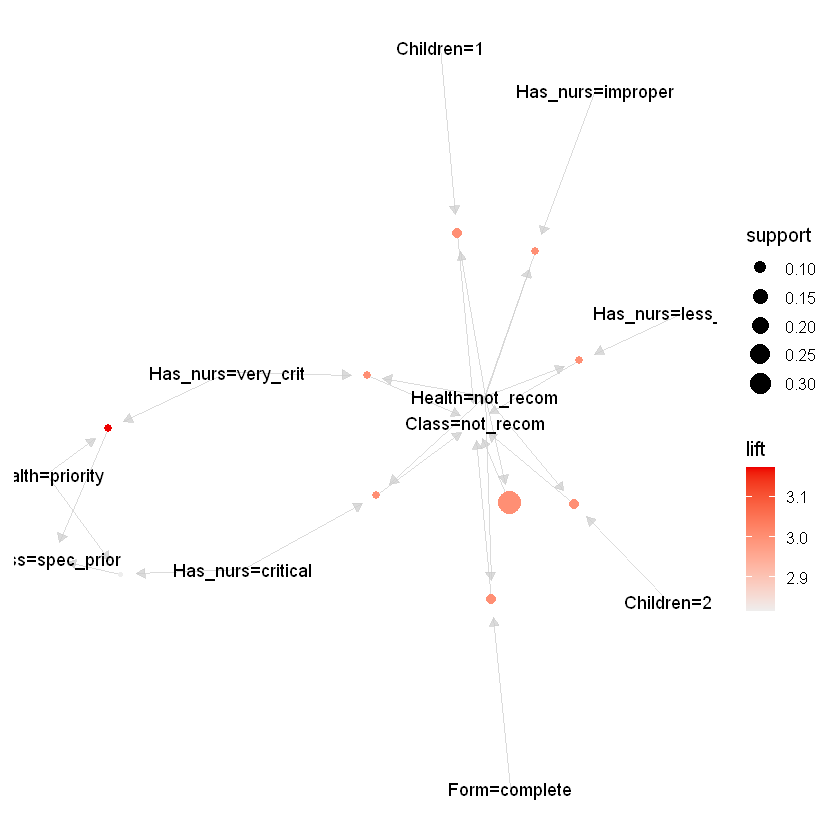

In [76]:
plot(rules[1:10], method="graph")